In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

Using TensorFlow backend.


In [3]:
tf.config.list_physical_devices()   # or device_lib.list_local_devices()

[PhysicalDevice(name=u'/physical_device:CPU:0', device_type=u'CPU'),
 PhysicalDevice(name=u'/physical_device:XLA_CPU:0', device_type=u'XLA_CPU'),
 PhysicalDevice(name=u'/physical_device:XLA_GPU:0', device_type=u'XLA_GPU'),
 PhysicalDevice(name=u'/physical_device:XLA_GPU:1', device_type=u'XLA_GPU')]

In [4]:
# should I run only on XLA_GPU s?

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:1 -> device: XLA_GPU device



In [5]:
tf.test.gpu_device_name()  ## ????????

''

In [6]:
height = 64
width = 256
channel = 3

In [7]:
clean_data=[]
path='/home/evren/classified_data/clean_data/clean_data/'
files=os.listdir(path)
for i in tqdm(files):
    img=cv2.imread(path+'/'+i,1)
    img=cv2.resize(img,(height, width))
    clean_data.append(img_to_array(img))

100%|██████████| 69071/69071 [10:13<00:00, 112.67it/s]


In [ ]:
noisy_15dB=[]
path_15dB='/home/evren/classified_data/noisy_data/15dB/15dB/'
files=os.listdir(path_15dB)
for i in tqdm(files):
    img=cv2.imread(path_15dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_15dB.append(img_to_array(img))

In [ ]:
noisy_20dB=[]
path_20dB='/home/evren/classified_data/noisy_data/20dB/20dB/'
files=os.listdir(path_20dB)
for i in tqdm(files):
    img=cv2.imread(path_20dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_20dB.append(img_to_array(img))

In [ ]:
noisy_25dB=[]
path_25dB='/home/evren/classified_data/noisy_data/25dB/25dB'
files=os.listdir(path_25dB)
for i in tqdm(files):
    img=cv2.imread(path_25dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_25dB.append(img_to_array(img))

In [ ]:
noisy_30dB=[]
path_30dB='/home/evren/classified_data/noisy_data/30dB/30dB'
files=os.listdir(path_30dB)
for i in tqdm(files):
    img=cv2.imread(path_30dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_30dB.append(img_to_array(img))


In [8]:
noisy_100dB=[]
path_100dB='/home/evren/classified_data/noisy_data/100dB/100dB'
files=os.listdir(path_100dB)
for i in tqdm(files):
    img=cv2.imread(path_100dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_100dB.append(img_to_array(img))

100%|██████████| 69071/69071 [11:54<00:00, 96.67it/s] 


In [9]:
clean_data = np.reshape(clean_data, (len(clean_data), height, width, channel))
clean_data = clean_data.astype('float32') / 255.

In [ ]:
noisy_15dB = np.reshape(noisy_15dB, (len(noisy_15dB), height, width, channel))
noisy_15dB = noisy_15dB.astype('float32') / 255.

In [ ]:
noisy_20dB = np.reshape(noisy_20dB, (len(noisy_20dB), height, width, channel))
noisy_20dB = noisy_20dB.astype('float32') / 255.

In [ ]:
noisy_25dB = np.reshape(noisy_25dB, (len(noisy_25dB), height, width, channel))
noisy_25dB = noisy_25dB.astype('float32') / 255.

In [ ]:
noisy_30dB = np.reshape(noisy_15dB, (len(noisy_30dB), height, width, channel))
noisy_30dB = noisy_30dB.astype('float32') / 255.

In [10]:
noisy_100dB = np.reshape(noisy_100dB, (len(noisy_100dB), height, width, channel))
noisy_100dB = noisy_100dB.astype('float32') / 255.

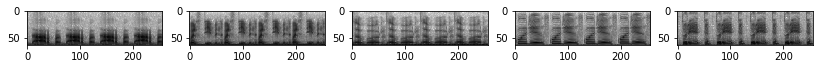

In [11]:
# Displaying clean images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(clean_data[i], cmap='binary')
plt.show()

In [ ]:
# Displaying 15dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_15dB[i], cmap='binary')
plt.show()

In [ ]:
# Displaying 20dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_20dB[i], cmap='binary')
plt.show()

In [ ]:
# Displaying 25dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_25dB[i], cmap='binary')
plt.show()

In [ ]:
# Displaying 30dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_30dB[i], cmap='binary')
plt.show()

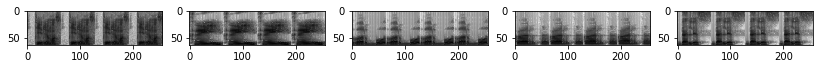

In [12]:
# Displaying 100dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_100dB[i], cmap='binary')
plt.show()

In [13]:
model = Sequential([
    
  # encoder
    Conv2D(512, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(channel, (3,3), padding="same", activation="sigmoid") # sigmoid, relu    
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 256, 512)      14336     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 256, 512)      2359808   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 256, 512)      2359808   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 128, 512)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 128, 512)      2359808   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 128, 512)      2359808   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 128, 512)      2

In [15]:
model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['accuracy'])

In [16]:
history = model.fit(noisy_100dB, clean_data,
          validation_split=0.2,
          batch_size=256,
          epochs=5)

Train on 55256 samples, validate on 13815 samples
Epoch 1/5
  256/55256 [..............................] - ETA: 12:59:40

ResourceExhaustedError:  OOM when allocating tensor with shape[256,64,256,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node sequential/up_sampling2d_4/resize/ResizeNearestNeighbor (defined at <ipython-input-16-2b0fb4019f25>:4) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_3176]

Function call stack:
distributed_function


In [ ]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()